# Fancy subplot grid
> GridSpec is your friend

![](subplot-grid.png)

## Introduction

With GridSpec you can create any combination of panels

## The code

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)

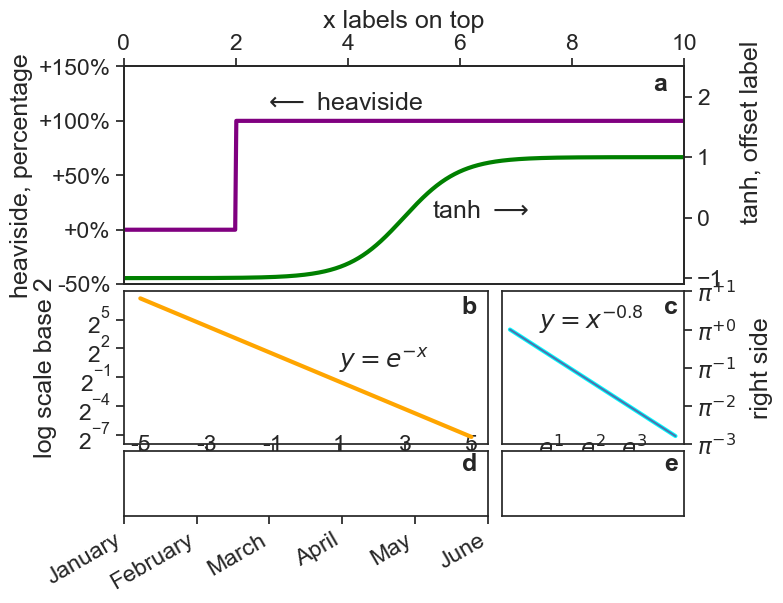

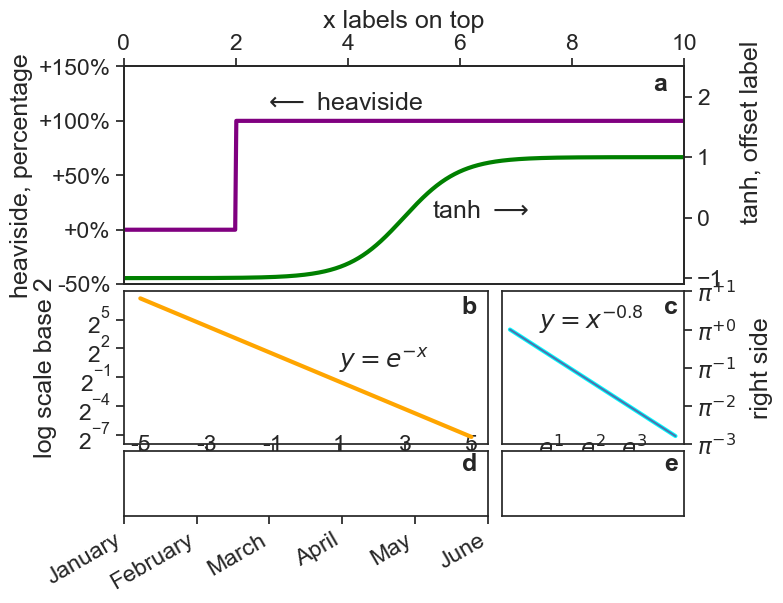

In [5]:
# figsize accepts only inches.
fig = plt.figure(1, figsize=(8, 6))
gs = gridspec.GridSpec(3, 2, width_ratios=[1,0.5], height_ratios=[1,0.7,0.3])
gs.update(left=0.16, right=0.86,top=0.88, bottom=0.13, hspace=0.05, wspace=0.05)

###########
# subplot a
###########
ax0 = plt.subplot(gs[0, :])

heaviside = lambda x: 0.5 * (np.sign(x) + 1)
x = np.arange(0, 10.01, 0.01)
ax0.plot(x, heaviside(x - 2), color='purple', lw=3)
ax0.text(2.5, 1.1, r"$\longleftarrow$ heaviside")

# y ticks as a percentage
ax0.set_yticks(np.arange(-0.5, 2.0, 0.5))
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = "{:+.0f}".format(y * 100)  # str(100 * y)
    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)
# Set the formatter
ax0.yaxis.set_major_formatter(formatter)
ax0.set_ylabel("heaviside, percentage")

# x ticks on top
ax0.axis([x.min(), x.max(), -0.5, 1.5])
ax0.xaxis.tick_top()
ax0.set_xlabel(r"x labels on top")
ax0.xaxis.set_label_position("top")

# transAxes makes position relative to axes
ax0.text(0.97, 0.97, r"a", transform=ax0.transAxes,
         horizontalalignment='right', verticalalignment='top',
         fontweight="bold")

# copy window with same x axis (y will be different)
ax0b = ax0.twinx()
ax0b.plot(x, np.tanh(x - 5), color="green", linewidth=3)
ax0b.axis([x.min(), x.max(), -1.1, 2.5])
ax0b.text(5.5, 0, r"tanh $\longrightarrow$")
ax0b.set_ylabel(r'tanh, offset label')
ax0b.yaxis.set_label_coords(1.1, 0.70)

###########
# subplot b
###########
ax10 = plt.subplot(gs[1, 0])

x = np.arange(-5, 5, 0.01)
y = np.exp(-x)
ax10.plot(x, y, color="orange", lw=3)
ax10.set_yscale('log', base=2)
ax10.set_yticks(2.0 ** np.arange(-7, 7, 3))
ax10.text(1.0, 1, r"$y=e^{-x}$")
ax10.set_xticks(np.arange(-5, 6, 2))
ax10.set_xticklabels(np.arange(-5, 6, 2), y=0.15)
ax10.get_yaxis().set_tick_params(direction='out')
ax10.set_ylabel("log scale base 2", labelpad=15)
ax10.text(0.97, 0.97, r"b", transform=ax10.transAxes,
          horizontalalignment='right', verticalalignment='top',
          fontweight="bold")

###########
# subplot c
###########
ax11 = plt.subplot(gs[1, 1])

x = np.arange(1.0, np.e ** 4, 0.01)
y = x ** (-0.8)
ax11.plot(x, y, color="cyan", lw=3)
ax11.text(2, 1, r"$y=x^{-0.8}$")
ax11.loglog(x, y)
ax11.set_xscale("log", base=np.e)
ax11.set_yscale("log", base=np.e)
xt = np.exp(np.arange(1, 4, 1))
yt = np.pi ** (np.arange(-3, 2, 1))
ax11.set_xticks(xt)
ax11.set_xticklabels(xt, y=0.15)
ax11.set_yticks(yt)


def ticks_e(y, pos):   # base e
    return r'$e^{:.0f}$'.format(np.log(y))


def ticks_pi(y, pos):  # base pi, why not?
    return r'$\pi^{%+.0f}$'%(np.log(y)/np.log(np.pi))


ax11.xaxis.set_major_formatter(FuncFormatter(ticks_e))
ax11.yaxis.set_major_formatter(FuncFormatter(ticks_pi))
ax11.yaxis.tick_right()
ax11.yaxis.set_label_position("right")
ax11.set_ylabel("right side", labelpad=10)
ax11.text(0.97, 0.97, r"c", transform=ax11.transAxes,
          horizontalalignment='right', verticalalignment='top',
          fontweight="bold")

###########
# subplot d
###########
ax20 = plt.subplot(gs[2, 0])

ax20.axis([0, 1, 0, 1])
ax20.set_xticks(np.arange(0, 1.1, 0.2))
ax20.set_xticklabels(["January", "February",
                      "March", "April",
                      "May", "June"],
                      rotation=30, horizontalalignment="right")
ax20.set_yticks([])
ax20.text(0.97, 0.97, r"d", transform=ax20.transAxes,
          horizontalalignment='right', verticalalignment='top',
          fontweight="bold")

###########
# subplot e
###########
ax21 = plt.subplot(gs[2, 1])

ax21.set_xticks([])
ax21.set_yticks([])
ax21.axis([0, 1, 0, 1])
ax21.text(0.97, 0.97, r"e", transform=ax21.transAxes,
          horizontalalignment='right', verticalalignment='top',
          fontweight="bold")

fig.savefig("subplot-grid.png", dpi=300)
fig